<a href="https://colab.research.google.com/github/MatheusRocha0/Recommendation_Engine/blob/main/Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recommendation Engine
 
YouTube, Amazon, Facebook and Instagram are some of the companies that use this kind of implemantation. This kind of project is the most commonly used Data Science application in the entire world. Some years ago, you would have to hire the best statisticians and mathematicians of the world to build a nice system. But nowadays with our advanced technology, anyone can build their own recommendation system.
 
# Recommendation Engine Types
 
 There are basically three distinct types of reccomender systems:
 
## Collaborative Filtering
 
This filtering method is usually based on collecting and analyzing information on user’s behaviors, their activities or preferences and predicting what they will like based on the similarity with other users. A key advantage of the collaborative filtering approach is that it does not rely on machine analyzable content and thus it is capable of accurately recommending complex items such as movies without requiring an “understanding” of the item itself. 
 
## Content-Based Filtering
 
These filtering methods are based on the description of an item and a profile of the user’s preferred choices. In a content-based recommendation system, keywords are used to describe the items; besides, a user profile is built to state the type of item this user likes. 
 
## Hybrid Recommendation Systems
 
Recent research shows that combining collaborative and content-based recommendation can be more effective. Hybrid approaches can be implemented by making content-based and collaborative-based predictions separately and then combining them. Further, by adding content-based capabilities to a collaborative-based approach and vice versa; or by unifying the approaches into one model.
 
## Scikit Surprise
 
Surprise (stards for *Simple Python Recommendation System Engine*) is an easy-to-use Python scikit for recommender systems. This tool allows anyone to build Collaborative Filtering Reccomendation Engines easily using Python with few lines of code.
 
# About the Project
 
In this project, I am going to build a Recommendation Engine using Scikit-surprise library.
 
# About the Dataset
 
The dataset I will be using for this project is the Movielens Dataset. You can download it here: https://bit.ly/3qDOziX
 
This dataset brings informations like: movie title, user id, movie id and movie genre. A perfect dataset example for training recommendation systems.

# Importing

## Installing Surprise

In [5]:
pip install scikit-surprise

## Importing Libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from surprise import Reader, Dataset, SVDpp, accuracy
from surprise.model_selection import train_test_split, cross_validate
import pickle

## Importing the Data

In [7]:
movies = pd.read_csv("https://raw.githubusercontent.com/MatheusRocha0/Recommendation_Engine/main/movies.csv")
ratings = pd.read_csv("https://raw.githubusercontent.com/MatheusRocha0/Recommendation_Engine/main/ratings.csv")
 
movies.drop("genres", axis = 1, inplace = True)
ratings.drop("timestamp", axis = 1, inplace = True)
 
data = pd.merge(ratings, movies, on = "movieId")
data.head()

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)


# Data Cleaning

## Missing Values

In [8]:
data.isnull().sum()

userId     0
movieId    0
rating     0
title      0
dtype: int64

## Dropping Duplicates

In [9]:
data.drop_duplicates(inplace = True)

## Preprocessing the Data
 
Here, I am applying the Reader and Dataset classes into the dataset because Scikit-surprise needs it.

In [10]:
reader = Reader(rating_scale = (0.5, 5))
dataset = Dataset.load_from_df(data.drop("title", axis = 1), reader)

## Splitting Data Into Training and Testing Sets
 
To avoid Overfitting (when the model can not predict unknown data), I will split the dataset into Training and Testing sets.

In [11]:
train_set, test_set = train_test_split(dataset, test_size = .5)

# Exploratory Data Analysis (EDA)

## Dataset Shape

In [12]:
print("Observations: ", data.shape[0])
print("Variables: ", data.shape[1])

Observations:  100836
Variables:  4


## Dataset Dtypes

In [13]:
data.dtypes

userId       int64
movieId      int64
rating     float64
title       object
dtype: object

## How Many Users?

In [14]:
print(len(data.userId.unique()), "different users")

610 different users


## How Many Movies?

In [15]:
print(len(data.movieId.unique()), "different movies")

9724 different movies


## Statistics

In [16]:
data.rating.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

**Standard Deviation (std)**: how much a value vary from the mean.
 
**Mean**: the sum of values divided by its length
 
**25%, 50% and 75%**: the maximum value for [number]% of the data.

## Rating Distributions

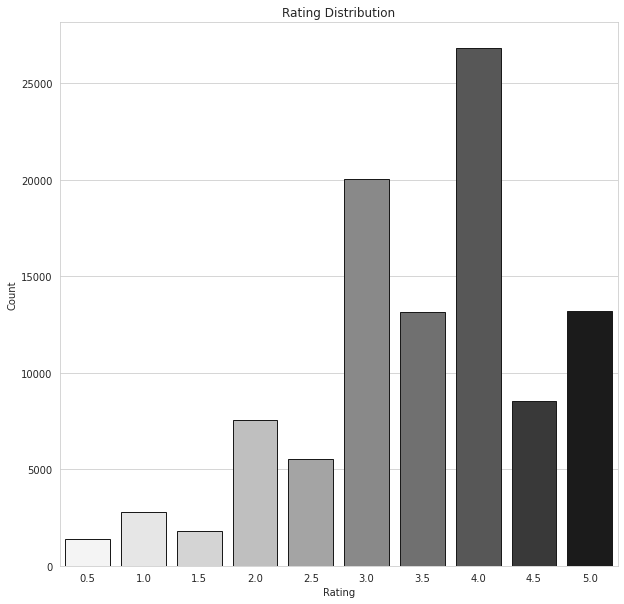

In [17]:
sb.set_style("whitegrid")
plt.figure(figsize = (10, 10))
sb.countplot(x = data.rating, palette = "Greys", edgecolor = ".1")
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

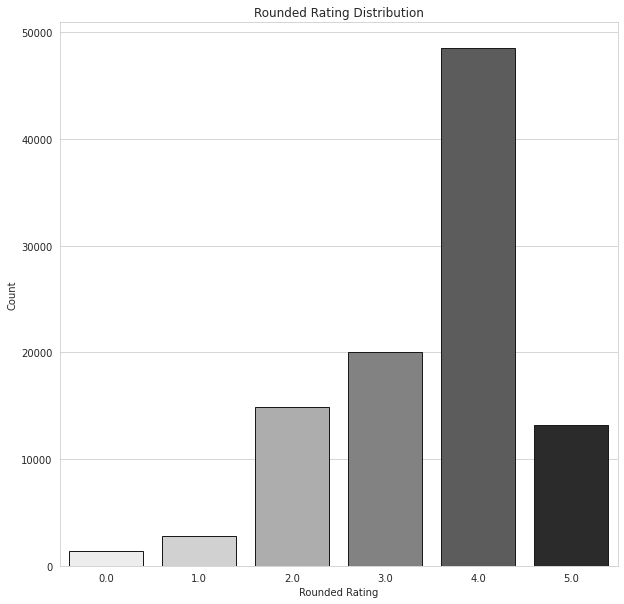

In [18]:
data["Rounded Rating"] = round(data.rating)
plt.figure(figsize = (10, 10))
sb.countplot(x = data["Rounded Rating"].values, palette = "Greys", edgecolor = ".1")
plt.title("Rounded Rating Distribution")
plt.xlabel("Rounded Rating")
plt.ylabel("Count")
plt.show()

Something that is very interesting about the fisrt plot is that the rounded ratings are always bigger than the decimal ones.
 
It is also possible to see that most of the rating values is over 3.

## Top 20 Best Movies

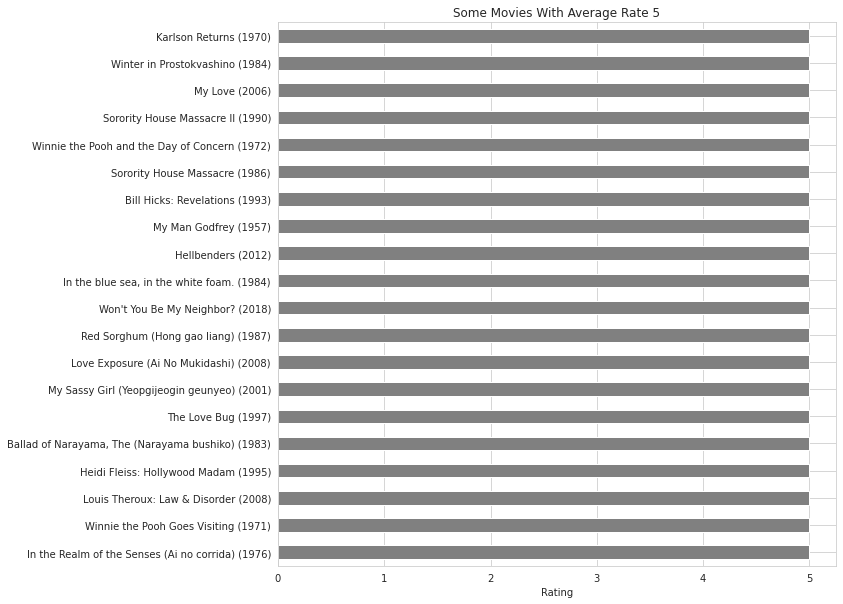

In [19]:
data.groupby("title")["rating"].mean().sort_values().tail(20).plot.barh(figsize = (10, 10), color = "grey")
plt.title("Some Movies With Average Rate 5")
plt.xlabel("Rating")
plt.ylabel("")
plt.show()

## Top 20 Worst Movies

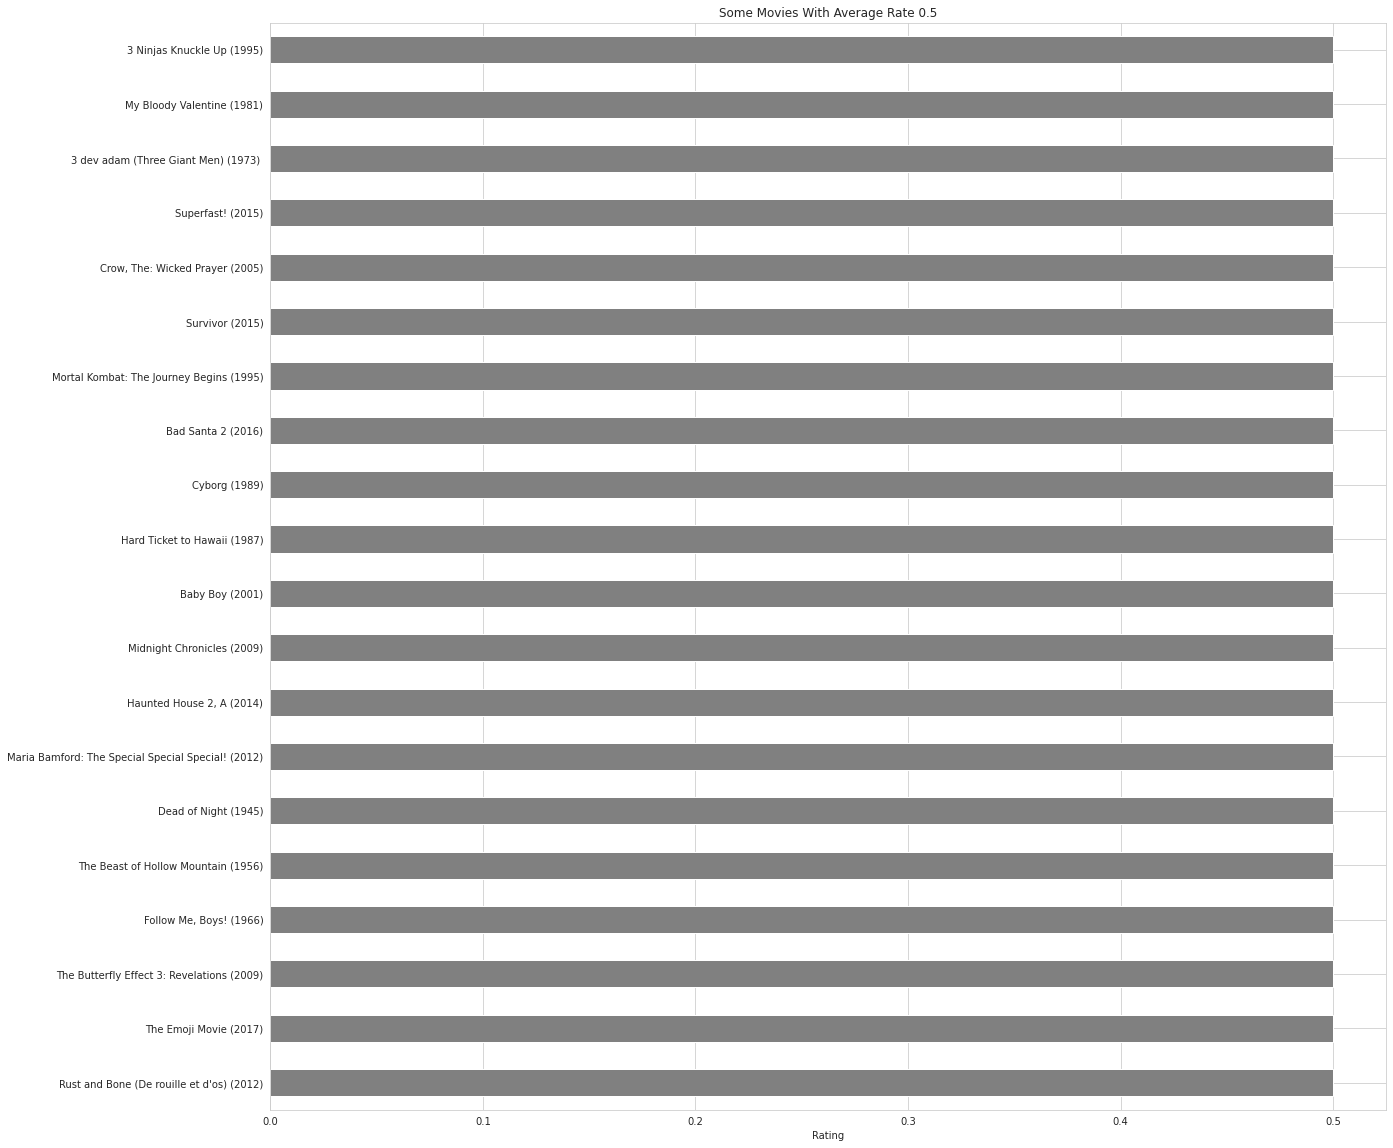

In [20]:
data.groupby("title")["rating"].mean().sort_values().head(20).plot.barh(figsize = (20, 20), color = "grey")
plt.title("Some Movies With Average Rate 0.5")
plt.xlabel("Rating")
plt.ylabel("")
plt.show()

## Users With Highest Rating

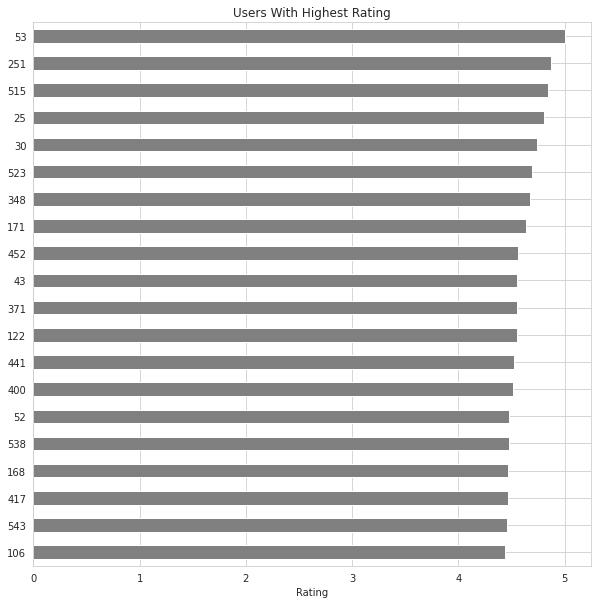

In [21]:
data.groupby("userId")["rating"].mean().sort_values().tail(20).plot.barh(figsize = (10, 10), color = "gray")
plt.title("Users With Highest Rating")
plt.xlabel("Rating")
plt.ylabel("")
plt.show()

## Users With Lowest Rating

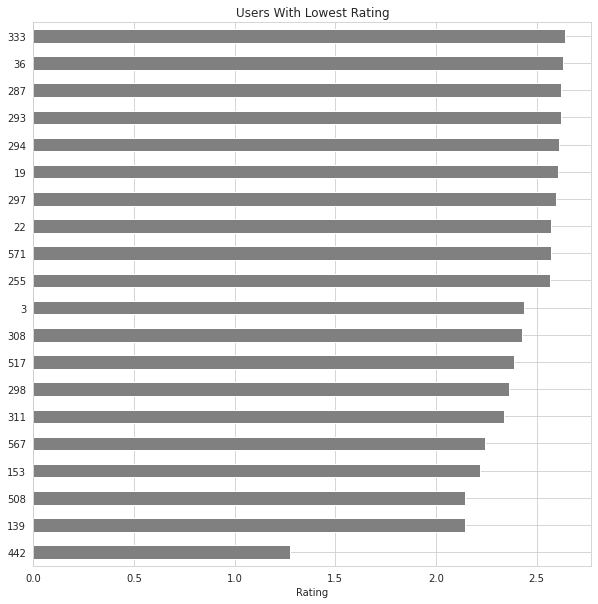

In [22]:
data.groupby("userId")["rating"].mean().sort_values().head(20).plot.barh(figsize = (10, 10), color = "gray")
plt.title("Users With Lowest Rating")
plt.xlabel("Rating")
plt.ylabel("")
plt.show()

# Machine Learning Model

## Training the SVD++ Algorithm
 
The SVD++ algorithm is an extension of SVD that also uses the implicit rating and does not care about the rating value.

In [23]:
engine = SVDpp(
random_state = 1,
n_epochs = 30,
lr_all = .01,
reg_all = .07
)
 
engine.fit(train_set)

## Evaluating the Model
 
The metric I am using is the Root Mean Squared Error. RMSE is the standard deviation of the errors which occur when a prediction is made on a dataset. This is the same as MSE (Mean Squared Error) but the root of the value is considered while determining the accuracy of the model. The lower the better. 0.87 is considered a great value when talking about regression tasks.

In [24]:
p = engine.test(test_set)
score = accuracy.rmse(p)

RMSE: 0.8788


# Making Predictions
 
As this model works like a regression algorithm, not like a classificator, I will choose 3 as the minimum rating to say that the user is going to like the movie.
 
This model takes UserID and MovieID/ItemID as inputs and then returns how the user is probably going to rate the movie. That is why it is necessary to choose a limit to say that a user is going to like a certain item.
 
If the user is going to rate a item more than 3, the algorithm recommends this item to the user.

In [46]:
specific_user = data.query("userId == 6 and rating >= 3")["title"].values

In [58]:
def recommend(engine, user_id, item_id):
   result = engine.predict(user_id, item_id)
   specific_user = data.query("userId == 6 and rating >= 3")["title"].values  
   movie_title = data.loc[data.index == item_id]["title"].values[0]
 
   if result.est > 3:
      print("YOU LIKED:")
      print(*specific_user, sep = "\n")
      print("-----")
      print("YOU ARE PROBABLY GOING TO LIKE: ", movie_title)
 
recommend(engine, 6, 32)

YOU LIKED:
Grumpier Old Men (1995)
Heat (1995)
Seven (a.k.a. Se7en) (1995)
Braveheart (1995)
Rob Roy (1995)
Desperado (1995)
Billy Madison (1995)
Dumb & Dumber (Dumb and Dumber) (1994)
Stargate (1994)
Tommy Boy (1995)
Clear and Present Danger (1994)
Forrest Gump (1994)
Jungle Book, The (1994)
Mask, The (1994)
Fugitive, The (1993)
Jurassic Park (1993)
Mrs. Doubtfire (1993)
Schindler's List (1993)
So I Married an Axe Murderer (1993)
Three Musketeers, The (1993)
Tombstone (1993)
Dances with Wolves (1990)
Batman (1989)
Silence of the Lambs, The (1991)
Pinocchio (1940)
Fargo (1996)
Twister (1996)
Independence Day (a.k.a. ID4) (1996)
That Thing You Do! (1996)
Ghost and the Darkness, The (1996)
Willy Wonka & the Chocolate Factory (1971)
Shawshank Redemption, The (1994)
Dangerous Minds (1995)
Courage Under Fire (1996)
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
To Die For (1995)
NeverEnding Story III, The (1994)
Jeffrey (1995)
Circle of Friends (1995)
Like Water for Chocolate (Como agua para cho

# That Is How This Engine Works